In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import matplotlib.pyplot as plt

In [8]:
conn = sqlite3.connect('database.sqlite')

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table';""", conn)
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [19]:
def extract_tables(x):
    y =pd.read_sql(f"""SELECT * FROM {x};""", conn)
    
    return y

In [33]:
player_attributes = extract_tables('Player_Attributes')
player_attributes.head()


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [32]:
countries = extract_tables('Country')
countries.head()


,id,name
0,1,Belgium
1,1729,England
2,4769,France
3,7809,Germany
4,10257,Italy


In [27]:
player = extract_tables('Player') 
player.head()


,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187
1,2,155782,Aaron Cresswell,189615,1989-12-15 00:00:00,170.18,146
2,3,162549,Aaron Doran,186170,1991-05-13 00:00:00,170.18,163
3,4,30572,Aaron Galindo,140161,1982-05-08 00:00:00,182.88,198
4,5,23780,Aaron Hughes,17725,1979-11-08 00:00:00,182.88,154


In [28]:
match = extract_tables('Match')
match.head()


,id,country_id,league_id,season,stage,date,match_api_id,home_team_api_id,away_team_api_id,home_team_goal,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,1,1,2008/2009,1,2008-08-17 00:00:00,492473,9987,9993,1,...,4.00,1.65,3.40,4.50,1.78,3.25,4.00,1.73,3.40,4.20
1,2,1,1,2008/2009,1,2008-08-16 00:00:00,492474,10000,9994,0,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
2,3,1,1,2008/2009,1,2008-08-16 00:00:00,492475,9984,8635,0,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
3,4,1,1,2008/2009,1,2008-08-17 00:00:00,492476,9991,9998,5,...,7.50,1.45,3.75,6.50,1.50,3.75,5.50,1.44,3.75,6.50
4,5,1,1,2008/2009,1,2008-08-16 00:00:00,492477,7947,9985,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67


In [29]:
team = extract_tables('Team') 
team.head()

,id,team_api_id,team_fifa_api_id,team_long_name,team_short_name
0,1,9987,673.0,KRC Genk,GEN
1,2,9993,675.0,Beerschot AC,BAC
2,3,10000,15005.0,SV Zulte-Waregem,ZUL
3,4,9994,2007.0,Sporting Lokeren,LOK
4,5,9984,1750.0,KSV Cercle Brugge,CEB


In [30]:
team_attributes =extract_tables('Team_Attributes')
team_attributes.head()


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,1,434,9930,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,Mixed,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,2,434,9930,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,3,434,9930,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,Mixed,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,4,77,8485,2010-02-22 00:00:00,70,Fast,NaN,Little,70,Long,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,5,77,8485,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,Mixed,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [31]:
league = extract_tables('League')
league.head()


,id,country_id,name
0,1,1,Belgium Jupiler League
1,1729,1729,England Premier League
2,4769,4769,France Ligue 1
3,7809,7809,Germany 1. Bundesliga
4,10257,10257,Italy Serie A


In [11]:
leagues = pd.read_sql("""SELECT * FROM LEAGUE
                        JOIN Country ON League.country_id;""", conn)
leagues

,id,country_id,name,id,name
0,1,1,Belgium Jupiler League,1,Belgium
1,1,1,Belgium Jupiler League,1729,England
2,1,1,Belgium Jupiler League,4769,France
3,1,1,Belgium Jupiler League,7809,Germany
4,1,1,Belgium Jupiler League,10257,Italy
...,...,...,...,...,...
116,24558,24558,Switzerland Super League,15722,Poland
117,24558,24558,Switzerland Super League,17642,Portugal
118,24558,24558,Switzerland Super League,19694,Scotland
119,24558,24558,Switzerland Super League,21518,Spain


In [38]:
print(list(match.columns))

['id', 'country_id', 'league_id', 'season', 'stage', 'date', 'match_api_id', 'home_team_api_id', 'away_team_api_id', 'home_team_goal', 'away_team_goal', 'home_player_X1', 'home_player_X2', 'home_player_X3', 'home_player_X4', 'home_player_X5', 'home_player_X6', 'home_player_X7', 'home_player_X8', 'home_player_X9', 'home_player_X10', 'home_player_X11', 'away_player_X1', 'away_player_X2', 'away_player_X3', 'away_player_X4', 'away_player_X5', 'away_player_X6', 'away_player_X7', 'away_player_X8', 'away_player_X9', 'away_player_X10', 'away_player_X11', 'home_player_Y1', 'home_player_Y2', 'home_player_Y3', 'home_player_Y4', 'home_player_Y5', 'home_player_Y6', 'home_player_Y7', 'home_player_Y8', 'home_player_Y9', 'home_player_Y10', 'home_player_Y11', 'away_player_Y1', 'away_player_Y2', 'away_player_Y3', 'away_player_Y4', 'away_player_Y5', 'away_player_Y6', 'away_player_Y7', 'away_player_Y8', 'away_player_Y9', 'away_player_Y10', 'away_player_Y11', 'home_player_1', 'home_player_2', 'home_player_

In [44]:
dir()[-20:]

['countries',
 'create_connection',
 'detailed_matches',
 'exit',
 'extract_tables',
 'get_ipython',
 'league',
 'leagues',
 'match',
 'np',
 'pd',
 'player',
 'player_attributes',
 'plt',
 'quit',
 'select_all_tasks',
 'sqlite3',
 'tables',
 'team',
 'team_attributes']

In [45]:
league.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          11 non-null     int64 
 1   country_id  11 non-null     int64 
 2   name        11 non-null     object
dtypes: int64(2), object(1)
memory usage: 392.0+ bytes


In [46]:
player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [47]:
player_attributes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [51]:
player_attributes.isnull()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183973,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183974,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183975,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
183976,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [55]:
detailed_matches_spain = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Spain'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches_spain

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,21518,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,Valencia CF,RCD Mallorca,3,0
1,21525,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-30 00:00:00,RCD Espanyol,Real Valladolid,1,0
2,21519,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CA Osasuna,Villarreal CF,1,1
3,21520,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,RC Deportivo de La Coruña,Real Madrid CF,2,1
4,21521,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,CD Numancia,FC Barcelona,1,0
5,21522,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Racing Santander,Sevilla FC,1,1
6,21523,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Sporting de Gijón,Getafe CF,1,2
7,21524,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Real Betis Balompié,RC Recreativo,0,1
8,21526,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Athletic Club de Bilbao,UD Almería,1,3
9,21527,Spain,Spain LIGA BBVA,2008/2009,1,2008-08-31 00:00:00,Atlético Madrid,Málaga CF,4,0


In [69]:
detailed_matches_italy = pd.read_sql("""SELECT Match.id, 
                                        Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season, 
                                        stage, 
                                        date,
                                        HT.team_long_name AS  home_team,
                                        AT.team_long_name AS away_team,
                                        home_team_goal, 
                                        away_team_goal                                        
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'Italy'
                                ORDER by date
                                LIMIT 10;""", conn)
detailed_matches_italy

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,10264,Italy,Italy Serie A,2008/2009,1,2008-08-30 00:00:00,Sampdoria,Inter,1,1
1,10266,Italy,Italy Serie A,2008/2009,1,2008-08-30 00:00:00,Udinese,Palermo,3,1
2,10257,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Atalanta,Siena,1,0
3,10258,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Cagliari,Lazio,1,4
4,10259,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Catania,Genoa,1,0
5,10260,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Chievo Verona,Reggio Calabria,2,1
6,10261,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Fiorentina,Juventus,1,1
7,10262,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Milan,Bologna,1,2
8,10263,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Roma,Napoli,1,1
9,10265,Italy,Italy Serie A,2008/2009,1,2008-08-31 00:00:00,Torino,Lecce,3,0


In [72]:
#Not giving an alias while accessing the same column of a table results in an error:ambiguous column name
details = pd.read_sql("""SELECT Match.id,
                                    Country.name AS country_name,
                                    League.name AS league_name,
                                    Match.season,
                                    Team.team_long_name AS home_team,
                                    Team.team_long_name AS away_team,
                                    home_team_goal,
                                    away_team_goal
                                FROM Match
                                JOIN Country ON Country.id= Match.country_id
                                JOIN League ON League.id = Match.league_id
                                JOIN Team ON Team.team_api_id = Match.home_team_api_id
                                JOIN Team ON Team.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'France'
                                ORDER BY date
                                LIMIT 10;
                                """, conn)

DatabaseError: Execution failed on sql 'SELECT Match.id,
                                Country.name AS country_name,
                                League.name AS league_name,
                                Match.season,
                                Team.team_long_name AS home_team,
                                Team.team_long_name AS away_team,
                                home_team_goal,
                                away_team_goal
                            FROM Match
                            JOIN Country ON Country.id= Match.country_id
                            JOIN League ON League.id = Match.league_id
                            JOIN Team ON Team.team_api_id = Match.home_team_api_id
                            JOIN Team ON Team.team_api_id = Match.away_team_api_id
                            WHERE country_name = 'France'
                            ORDER BY date
                            LIMIT 10;
                            ': ambiguous column name: Team.team_long_name

In [65]:
details = pd.read_sql("""SELECT Match.id,
                                Country.name AS country_name,
                                League.name AS league_name,
                                Match.season,
                                HT.team_long_name AS home_team,
                                AT.team_long_name AS away_team,
                                home_team_goal,
                                away_team_goal
                                FROM Match
                                JOIN Country ON Country.id= Match.id
                                JOIN League ON League.id = Match.league_id
                                LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT ON AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'France'
                                ORDER BY date
                                LIMIT 10;
                                """, conn)
details

,id,country_name,league_name,season,home_team,away_team,home_team_goal,away_team_goal
0,4769,France,France Ligue 1,2008/2009,AJ Auxerre,FC Nantes,2,1


In [ ]:
details = pd.read_sql("""SELECT Match.id,
                                Country.name AS country_name,
                                League.name AS league_name,
                                Match.season,
                                HT.team_long_name AS home_team,
                                AT.team_long_name AS away_team,
                                home_team_goal,
                                away_team_goal
                                FROM Match
                                JOIN Country ON Country.id= Match.id
                                JOIN League ON League.id = Match.league_id
                                LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT ON AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'France'
                                ORDER BY date
                                LIMIT 10;
                                """, conn)
details

In [71]:
details = pd.read_sql("""SELECT Match.id,
                                Country.name AS country_name,
                                League.name AS league_name,
                                season,
                                stage,
                                date,
                                HT.team_long_name AS home_team,
                                AT.team_long_name AS away_team,
                                home_team_goal,
                                away_team_goal
                                FROM Match
                                JOIN Country ON Country.id= Match.country_id
                                JOIN League ON League.id = Match.league_id
                                LEFT JOIN Team AS HT ON HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT ON AT.team_api_id = Match.away_team_api_id
                                WHERE country_name = 'France'
                                ORDER BY date
                                LIMIT 10;
                                """, conn)

details

,id,country_name,league_name,season,stage,date,home_team,away_team,home_team_goal,away_team_goal
0,4769,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,AJ Auxerre,FC Nantes,2,1
1,4770,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Girondins de Bordeaux,SM Caen,2,1
2,4771,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Le Havre AC,OGC Nice,1,0
3,4772,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Le Mans FC,FC Lorient,0,1
4,4774,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,AS Monaco,Paris Saint-Germain,1,0
5,4775,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,AS Nancy-Lorraine,LOSC Lille,0,0
6,4776,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Stade Rennais FC,Olympique de Marseille,4,4
7,4777,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,FC Sochaux-Montbéliard,Grenoble Foot 38,1,2
8,4778,France,France Ligue 1,2008/2009,1,2008-08-09 00:00:00,Valenciennes FC,AS Saint-Étienne,1,0
9,4773,France,France Ligue 1,2008/2009,1,2008-08-10 00:00:00,Olympique Lyonnais,Toulouse FC,3,0


In [88]:
leages_by_season = pd.read_sql("""SELECT Country.name AS country_name, 
                                        League.name AS league_name, 
                                        season,
                                        count(distinct stage) AS number_of_stages,
                                        count(distinct HT.team_long_name) AS number_of_teams,
                                        avg(home_team_goal) AS avg_home_team_scors, 
                                        avg(away_team_goal) AS avg_away_team_goals, 
                                        avg(home_team_goal-away_team_goal) AS avg_goal_dif, 
                                        avg(home_team_goal+away_team_goal) AS avg_goals, 
                                        sum(home_team_goal+away_team_goal) AS total_goals                                       
                                FROM Match
                                JOIN Country on Country.id = Match.country_id
                                JOIN League on League.id = Match.league_id
                                LEFT JOIN Team AS HT on HT.team_api_id = Match.home_team_api_id
                                LEFT JOIN Team AS AT on AT.team_api_id = Match.away_team_api_id
                                WHERE country_name in ('Spain', 'Germany', 'France', 'Italy', 'England')
                                GROUP BY Country.name, League.name, season
                                HAVING count(distinct stage) > 10
                                ORDER BY Country.name, League.name, season DESC
                                ;""", conn)
leages_by_season

,country_name,league_name,season,number_of_stages,number_of_teams,avg_home_team_scors,avg_away_team_goals,avg_goal_dif,avg_goals,total_goals
0,England,England Premier League,2015/2016,38,20,1.492105,1.207895,0.284211,2.700000,1026
1,England,England Premier League,2014/2015,38,20,1.473684,1.092105,0.381579,2.565789,975
2,England,England Premier League,2013/2014,38,20,1.573684,1.194737,0.378947,2.768421,1052
3,England,England Premier League,2012/2013,38,20,1.557895,1.239474,0.318421,2.797368,1063
4,England,England Premier League,2011/2012,38,20,1.589474,1.215789,0.373684,2.805263,1066
5,England,England Premier League,2010/2011,38,20,1.623684,1.173684,0.450000,2.797368,1063
6,England,England Premier League,2009/2010,38,20,1.697368,1.073684,0.623684,2.771053,1053
7,England,England Premier League,2008/2009,38,20,1.400000,1.078947,0.321053,2.478947,942
8,France,France Ligue 1,2015/2016,38,20,1.436842,1.089474,0.347368,2.526316,960
9,France,France Ligue 1,2014/2015,38,20,1.410526,1.081579,0.328947,2.492105,947


<AxesSubplot: title={'center': 'Average Goals Difference Home vs Out'}>

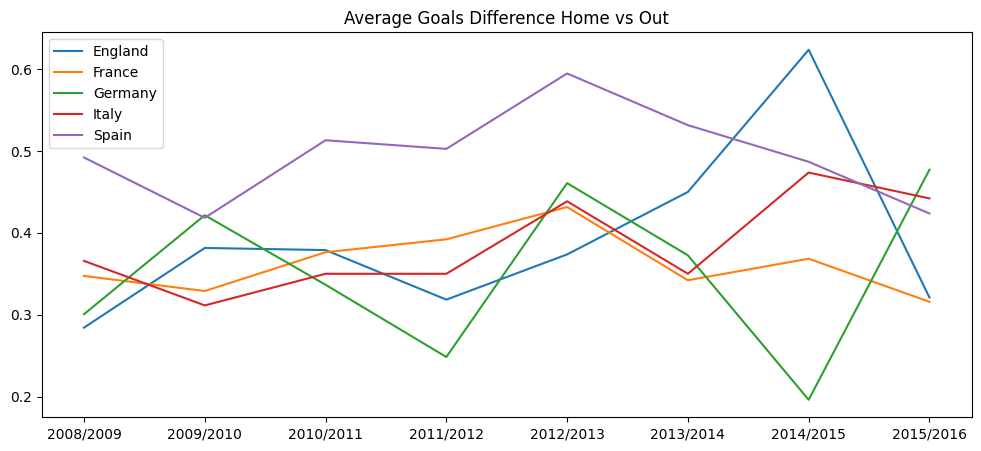

In [89]:
df = pd.DataFrame(index=np.sort(leages_by_season['season'].unique()), columns=leages_by_season['country_name'].unique())

df.loc[:,'Germany'] = list(leages_by_season.loc[leages_by_season['country_name']=='Germany','avg_goal_dif'])
df.loc[:,'Spain']   = list(leages_by_season.loc[leages_by_season['country_name']=='Spain','avg_goal_dif'])
df.loc[:,'France']   = list(leages_by_season.loc[leages_by_season['country_name']=='France','avg_goal_dif'])
df.loc[:,'Italy']   = list(leages_by_season.loc[leages_by_season['country_name']=='Italy','avg_goal_dif'])
df.loc[:,'England']   = list(leages_by_season.loc[leages_by_season['country_name']=='England','avg_goal_dif'])
#df.loc[:,'Belgium']   = list(leages_by_season.loc[leages_by_season['country_name']=='Belgium','avg_goal_dif'])

df.plot(figsize=(12,5),title='Average Goals Difference Home vs Out')

In [90]:
players_height = pd.read_sql("""SELECT CASE
                                        WHEN ROUND(height)<165 then 165
                                        WHEN ROUND(height)>195 then 195
                                        ELSE ROUND(height)
                                        END AS calc_height, 
                                        COUNT(height) AS distribution, 
                                        (avg(PA_Grouped.avg_overall_rating)) AS avg_overall_rating,
                                        (avg(PA_Grouped.avg_potential)) AS avg_potential,
                                        AVG(weight) AS avg_weight 
                            FROM PLAYER
                            LEFT JOIN (SELECT Player_Attributes.player_api_id, 
                                        avg(Player_Attributes.overall_rating) AS avg_overall_rating,
                                        avg(Player_Attributes.potential) AS avg_potential  
                                        FROM Player_Attributes
                                        GROUP BY Player_Attributes.player_api_id) 
                                        AS PA_Grouped ON PLAYER.player_api_id = PA_Grouped.player_api_id
                            GROUP BY calc_height
                            ORDER BY calc_height
                                ;""", conn)
players_height

,calc_height,distribution,avg_overall_rating,avg_potential,avg_weight
0,165.0,74,67.365543,73.327754,139.459459
1,168.0,118,67.500518,73.124182,144.127119
2,170.0,403,67.726903,73.379056,147.799007
3,173.0,530,66.980272,72.848746,152.824528
4,175.0,1188,66.805204,72.258774,156.111953
5,178.0,1489,66.367212,71.943339,160.665547
6,180.0,1388,66.419053,71.846394,165.261527
7,183.0,1954,66.634380,71.754555,170.167861
8,185.0,1278,66.928964,71.833475,174.636933
9,188.0,1305,67.094253,72.151949,179.278161


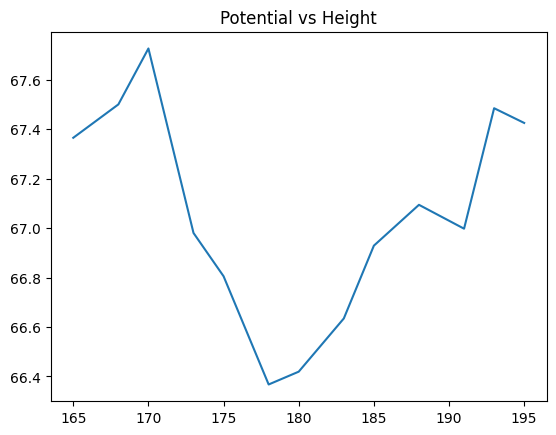

In [100]:
plt.plot(players_height['calc_height'],players_height['avg_overall_rating'])
plt.title('Potential vs Height')
plt.show()